In [1]:
using DrWatson
@quickactivate "BNP2"
using Turing, Revise, BNP2

;

┌ Info: Precompiling BNP2 [11504357-4fe5-5405-981c-8cd43ea31635]
└ @ Base loading.jl:1273


In [26]:
args = (
    dt        = 0.1,
    alg       = NUTS(100, 0.65),
    n_samples = 200,
)

;

In [28]:
data =
let obj = Particle(1.0, [0.0, 0.0], [10.0, 20.0]), force = [0.0, -9.81], n_steps = 20
    space = Space([Forced(obj, force)])
    traj = simulate(space, PymunkSimulator(args.dt), 2 * n_steps)
    HTML(animof([space, traj...]).to_html5_video()) |> display
    (traj = traj[1:n_steps], obj0 = obj)
end

;

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABy4m1kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAC8hliIQAK//+9nN8CmtHM5Uu\nBXb3bY+kMSjhe5UuWLggAAADAAADALD030J5B5ct0wAAAwO0AE/Nzi2YfoANVZut1l11B9eTA7j6\nby964YusgrohI09cWHFOjbhwCKX7cliY+JTr3vVDg4QR10VRC14uD5J+uLmb7N7hOPMxEszgARe8\nawod08kA3gwh9Id/kujNh2Uy3aEFbxfNwv3rEskGZL/hLNJsr2ZWFbM24hvHqx9wNzPtZc4I2sqy\nP7HD7OgXWcI0vER8DrbY8CPOJ/mIQdTm2d9Roe8svDxxUTqdzq95Ms3VrQktj6Vvuv6INX4ubhTH\n0ITOjBwBerfFEBzRyyx7kw2DzqPfp+9KaNfbnFkSYTk+7Frk0Xd6SaTgyxxpdx1Z3bY1PEYN1mht\n3PcNiTcW/RjPz1DvGoFw490p1r16byoWp7P+GsU9/lI9e12ku9Vhh6EzEMjy8BNFSfLl9IVJVG26\nvT+07zjgOj0730S5UscaYazgg+B3fUIdPpVItzAzswOuxm1k5RWxeYRqIgCovhGksYHrpBsWEIHw\nnmn/aVLlV5NhUu3ZhcRwL7dT8ShQdg95T1VVUeozYi8qfgHPY+mIxxilVOtxfLexqFr8P58yDgod\n+oUycDF6Wq89nBa+ZCQZyjd1Ca5pEWuC73ptYjVsmQ2r7Rd/x1xVtaO9HhYrfXmCzu2VZKisdwdg\nvOmRfaDs0+wbqBUWuKBsXQ0oBwFIzvROLepLVgIs7YpS0SN+c14ZNIFcm/Wkeb481hgLiGTY8D4V\n/u7nSyS5/XsmFR4VwPkc4F4CqT3x8LvCxVbXPcH3Vm/dsGyMHr+JiLOr/DXLQKQ+2gAwxkh8UpWH\niHdY8Cn5mJ7YFxTXQ3NJUr9RKU3ac/feebKDjtpa23CPAT1HX7gR72fE+gcBlzYVRg5B/KbLlQjX\niE+aa8BT0TdfzkyU2SUgGHvuPp2dXLTzMWFl2Y9xC9r1vudbATIYCVLkDN3qrCCYjddQga2AX2m8\nfgtyjSAm6K+7xXJAxZ0Bble8W4xoaeM12Lx5QJZxnFtWoS3GkeY1NulSjVSDz39ArQRGQfozVxzn\nOsommUKHFWn3VENZLJlcFiyx8NAxuTbo5GUT98Nde2c/oLY9iV0uwJaMM61okupN/wd67W6zJ2fm\n77G0ESVfaD1JST83JKyFKxcNUyqB2N0PZrQjY250A5CCwOiChmHviZPOAdRVUBlYKBOwp632ODll\nvKoHpPY51bwGwE+D0V0utbZVAZjLXm201+KO5wTu2f56CqDwE5y+HaQZD4TB4NpYwqXQdaiBPA9r\na6UIWj2sPCOv5sZqG8ag7dTOiKL/gR7tgBCf3jy9RmNLKFfbE4lSikQioHRwCK1SgTit348TMuZm\nfBTT8ZlaM97tOwaGchv8XIfuzxa4ncTxPQ3c/4F55CmoPpqzeA/iaeiPf6T34n+9GiASFbi6lLlm\nnOmHJuqcglQsAjJYsSZqYoDMs1N5dn3YLqMWh2VbFnRTObqxbHYR7QWf7lpF7Fv75IxTf1xMoeP6\niBpMC3r3LoQskP1m+wA29AlDbdKRJ2hjzy7efEAD73qXIV1uGFli5oe+pjehr7Nufd+psQaYOjt/\nZhkBqaBdDoGMU4nmjODcVL2R3K1JhXr4sTA1/tbmSXCKXxTNgPivjk1TlmO+ZbuFbV+LCrQS9EHY\njwR71bn/wT3RH58PtBWrsjwfXctDiFAACBSFzdZr5iMUV7IzRYbXDk/TeeloFDSL1PJ5NRhkt6l6\nLVCSWC6ICWd2JpgBQiIHettg0kIGctigpw1NUX8FIe8s981JAed1UoBgxGO0WoJIoIFg79veVhUI\nkZS6JdX8b3EEKPpsGZtuK4koNUOlccZmrIvOUHJzMTlhYmoeczTyeEiVXwbvWp8DCKm2W4ROzyLq\nLwT+1G246n0v5mZLOnJqRGi2V0D88Mbmnc+yRFoQjW9H6zP0sq6tQ795yw9niYLekJAumNUoMZdv\nuVZ3m20yGzENyGQvrx6dN4jpc6RU8aJCCXSdh880T8KGO3URX6zMAgGdTtNAIsgeClVgNW4CxyG8\nrQH0gYS/tNeKNxxPpmFiNosdqsr0d3G72suVMLfaS5658VPQ3dUm/QjGYIw9xD9U5Yzsnv+n7HEa\n8R32cYCrnH33NMNIunNXwowIEr+JPyLXw8PIvC21NOMsdfR2sUqk92M0RdKOMNkNJjiBNGm1hksD\ne4ymXOpK0NtmGcMZz9aJOMiZWtKWWKwfqYA2lkIL1lij1hXOwSCAfsZQtQIwOxj/dcrARYySPWzx\ndzWM1vVUQLH30/FwL0IS9o/I5/aWgWfriwEPwSsdAOTMg0WEaDOfJ/Xzzdb7ZpYWppxOVl940zQR\nEoQzXjWZspJ/wBonqrKRnbUlohF0wtSD4q9IB6o5uDhONvaPbJJuk5LO4dvGzfcyuARcimVJ1dUc\nUeI5gmSakr4G5By/rmyTCdsq0T6VIAKuaAM1WKIitmj6LI+5B2lZarXSefHZtz7+7GQn+tUO7Hhf\nYBtHahmqAVzalizK95G0izS7ZHSVr7KadhIbhKSnR6P+uEJ1h7/MYxjxrF2Djz0XS30H6HYEqXex\nfP0KUU3tI6gb2ey1u8qDkYxz0JFzssd7+bkngHLsT3Ti7E9JCtOllKf5s0+XyNjwVACkR//SWOse\nzj2+oOsmYol2C7fQqjvzW6opXv8sBtFxd1D9SmqRaqRlrHEIIuU4XAdFEo1bZCh1lDNqbLgbL1rR\niJXkFCx5tZx7tCPUqbvpkUA4nQc1vWbinEdyMi8yx4dhL+

## Single force

In [33]:
@model single_force(obj0, states, dt) = begin
    obj = obj0
    f ~ MvNormal(zeros(2), 10)
    for i in 1:length(states)
        obj′ = first(objectsof(transition(Space([Forced(obj, f)]), dt)))
        states[i] ~ MvNormal(vec(stateof(obj′)), 0.1)
        obj = obj′
    end
end

chn = sample(single_force(data.obj0, vec.(stateof.(data.traj)), args.dt), args.alg, args.n_samples)

chn |> display

;

Object of type Chains, with data of type 100×14×1 Array{Real,3}

Iterations        = 1:100
Thinning interval = 1
Chains            = 1
Samples per chain = 100
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth
parameters        = f[1], f[2]

2-element Array{ChainDataFrame,1}

Summary Statistics
  parameters     mean     std  naive_se     mcse       ess   r_hat
  ──────────  ───────  ──────  ────────  ───────  ────────  ──────
        f[1]   0.0020  0.0143    0.0014  missing  113.0529  0.9899
        f[2]  -9.5804  0.0137    0.0014  missing  152.1876  0.9905

Quantiles
  parameters     2.5%    25.0%    50.0%    75.0%    97.5%
  ──────────  ───────  ───────  ───────  ───────  ───────
        f[1]  -0.0220  -0.0081   0.0013   0.0123   0.0272
        f[2]  -9.6041  -9.5903  -9.5811  -9.5702  -9.5583


┌ Info: Found initial step size
│   ϵ = 0.025
└ @ Turing.Inference /Users/kai/.julia/packages/Turing/MoqTc/src/inference/hmc.jl:553


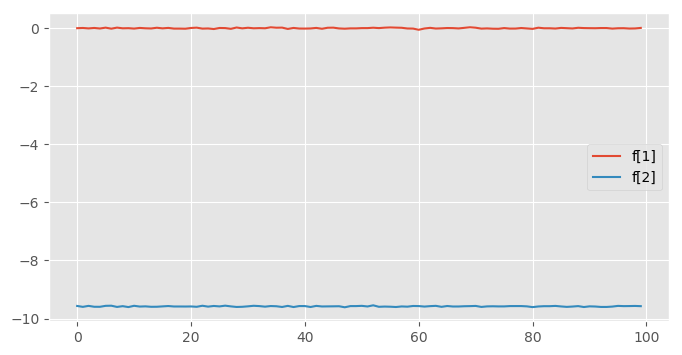

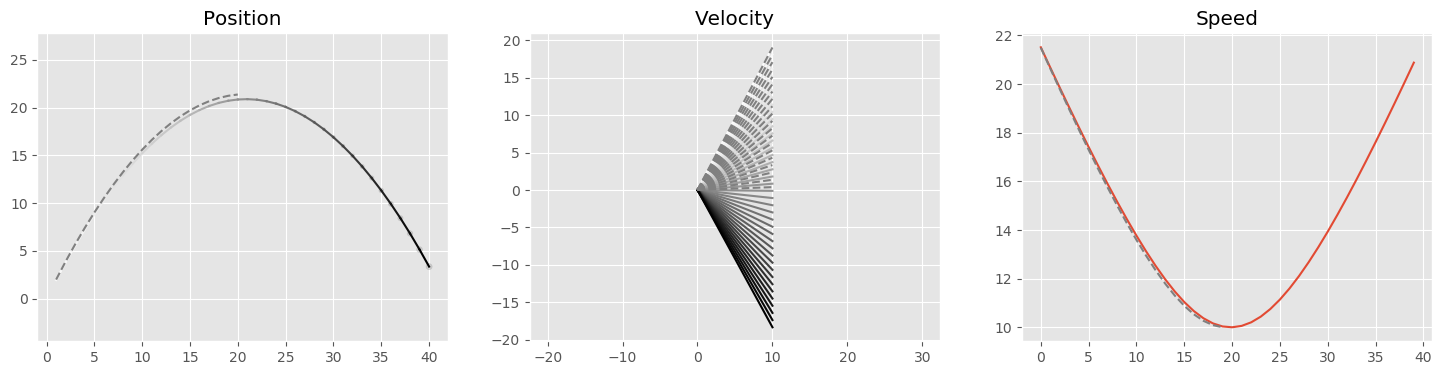

In [49]:
function meantraj(traj_list)
    pos = mean(t.pos for t in traj_list)
    vel = mean(t.vel for t in traj_list)
    return Particle.(1.0, pos, vel)
end

function stdtrajdev(traj_list)
    pos = mean(t.pos for t in traj_list)
    dev = []
    for t in 1:length(pos)
        ps = [traj_list[i].pos[t] for i in 1:length(traj_list)]
        push!(dev, 2 * sqrt(sum(std(ps).^2)))
    end
    return dev
end

function updatedev!(ax, traj_list)
    traj = meantraj(traj_list)
    dev = stdtrajdev(traj_list)
    for t in 1:length(traj)
        c = plt.Circle(tuple(positionof(traj[t])...), dev[t], color="gray", alpha=0.25)
        ax.add_artist(c)
    end
end

let res = get(chn, :f)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(res.f[1], label="f[1]")
    ax.plot(res.f[2], label="f[2]")
    ax.legend()
    fig |> display
end

let res = get(chn[end-99:end], [:f])
    traj_list = []
    for i in 1:100
        f = [res.f[1][i], res.f[2][i]]
        traj = simulate(Space([Forced(data.obj0, f)]), args.dt, 40)
        push!(traj_list, (pos=positionof.(traj), vel=velocityof.(traj)))
    end
    fig, axes = plot(meantraj(traj_list), data.traj)
    updatedev!(first(axes), traj_list)
    display(fig)
end

;

## Single force and particle parameters

In [6]:
@model single_force_all_params(pos_list, vel_list) = begin
    F ~ MvNormal(zeros(2), 10 * ones(2))
    mass ~ InverseGamma(2, 3)
    pos₀ ~ MvNormal(zeros(2), 10 * ones(2))
    vel₀ ~ MvNormal(zeros(2), 10 * ones(2))
    obj = Particle(mass, pos₀, vel₀)
    for i in 1:length(pos_list)
        obj′ = transition(obj, EarthWithForce(Force(F)), SimpleSimulator(args.dt))
        pos_list[i] ~ MvNormal(positionof(obj′), 0.1)
        vel_list[i] ~ MvNormal(velocityof(obj′), 0.1)
        obj = obj′
    end
end

chn = sample(single_force_all_params(positionof.(traj_data), velocityof.(traj_data)), alg, n_samples; progress_style=:plain)

chn |> display

;

Object of type Chains, with data of type 100×19×1 Array{Real,3}

Iterations        = 1:100
Thinning interval = 1
Chains            = 1
Samples per chain = 100
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth
parameters        = F[1], F[2], mass, pos₀[1], pos₀[2], vel₀[1], vel₀[2]

2-element Array{ChainDataFrame,1}

Summary Statistics
  parameters     mean     std  naive_se     mcse       ess   r_hat
  ──────────  ───────  ──────  ────────  ───────  ────────  ──────
        F[1]  14.1319  4.8309    0.4831  missing    3.2069  1.5442
        F[2]   0.0148  0.1347    0.0135  missing   56.7515  0.9901
        mass   1.4150  0.4827    0.0483  missing    3.1957  1.5452
     pos₀[1]  -0.2623  0.0354    0.0035  missing   99.1842  1.0114
     pos₀[2]   0.2536  0.0390    0.0039  missing  126.5475  0.9907
     vel₀[1]   9.9744  0.0731    0.0073 

┌ Info: Found initial step size
│   ϵ = 0.003125
└ @ Turing.Inference /Users/kai/.julia/packages/Turing/MoqTc/src/inference/hmc.jl:553


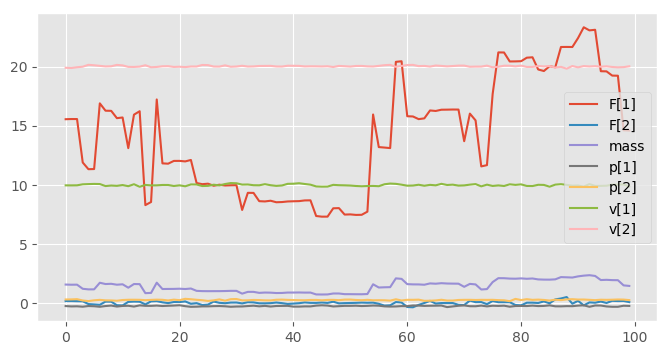

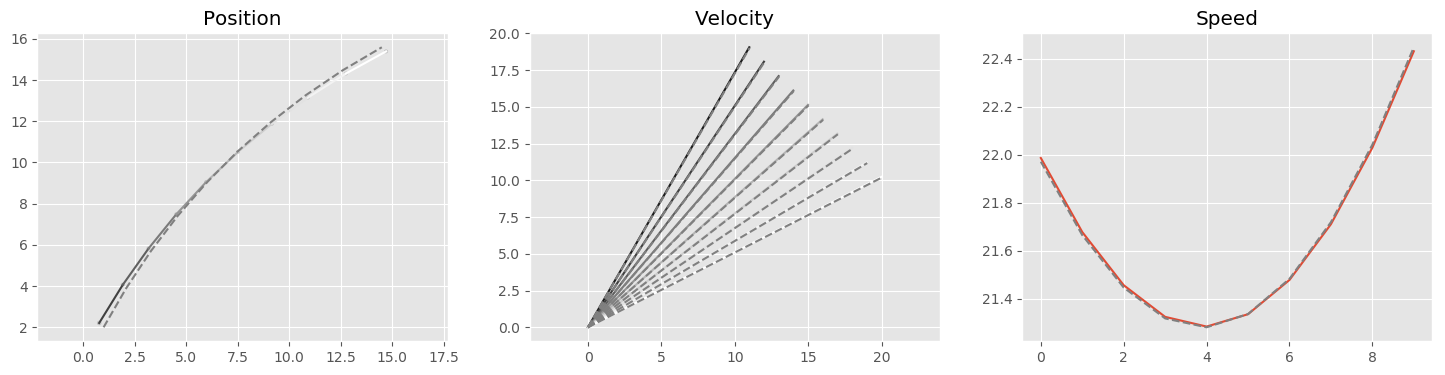

In [7]:
let res = get(chn, [:F, :mass, :pos₀, :vel₀])
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(res.F[1], label="F[1]")
    ax.plot(res.F[2], label="F[2]")
    ax.plot(res.mass, label="mass")
    ax.plot(res.pos₀[1], label="p[1]")
    ax.plot(res.pos₀[2], label="p[2]")
    ax.plot(res.vel₀[1], label="v[1]")
    ax.plot(res.vel₀[2], label="v[2]")
    ax.legend()
    fig |> display
end

let res = get(chn[end-99:end], [:F, :mass, :pos₀, :vel₀])
    traj_list = []
    for i in 1:100
        F = [res.F[1][i], res.F[2][i]]
        mass = res.mass[i]
        pos₀ = [res.pos₀[1][i], res.pos₀[2][i]]
        vel₀ = [res.vel₀[1][i], res.vel₀[2][i]]
        traj = simulate(Particle(mass, pos₀, vel₀), EarthWithForce(Force(F)), sim, 10)
        push!(traj_list, (pos=positionof.(traj), vel=velocityof.(traj)))
    end
    fig, axes = plot(meantraj(traj_list), traj_data)
    updatedev!(first(axes), traj_list)
    display(fig)
end

;

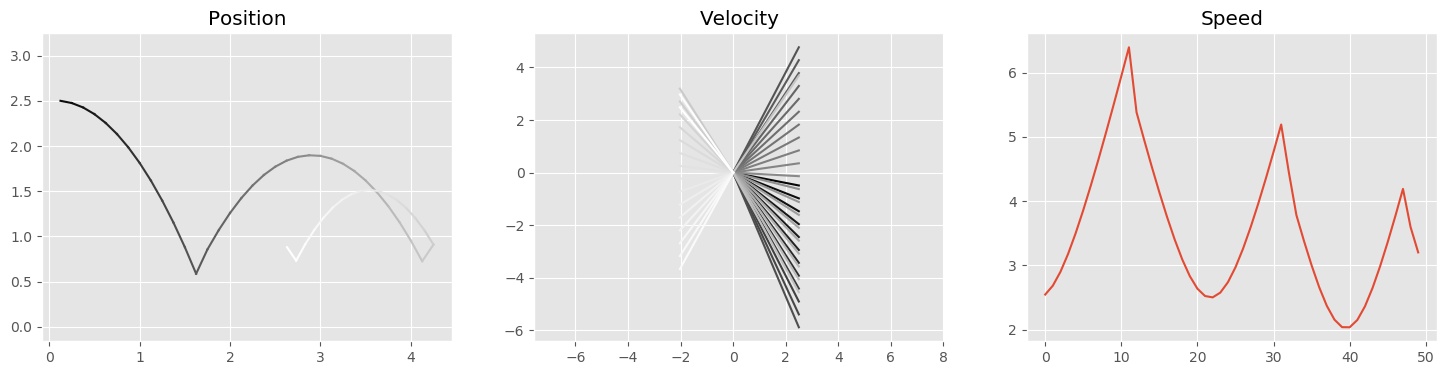

In [8]:
traj_obstacle = simulate(
    Particle(1.0, [0.0, 2.5], [2.5, 0.0]), 
    EarthWithObjects([Bar((-20.0, 0.0), (20.0, 0.0)), Bar((5.0, -20.0), (5.0, 20.0))]),
    PymunkSimulator(0.05),
    50,
)

plot(traj_obstacle) |> first |> display

## Each force for each time step

In [9]:
@model multiple_time_depedent_forces(pos_list, vel_list, ::Type{R}=Float64) where {R} = begin
    obj = Particle(1.0, [0.0, 2.5], [2.5, 0.0])
    T = length(pos_list)
    F = Vector{Vector{R}}(undef, T)
    for t in 1:T
        F[t] ~ MvNormal(zeros(2), 10 * ones(2))
        obj′ = transition(obj, EarthWithForce(Force(F[t])), sim005)
        pos_list[t] ~ MvNormal(positionof(obj′), 0.1)
        vel_list[t] ~ MvNormal(velocityof(obj′), 0.1)
        obj = obj′
    end
end

chn = sample(multiple_time_depedent_forces(positionof.(traj_obstacle), velocityof.(traj_obstacle)), alg, n_samples; progress_style=:plain)

chn |> display

;

Object of type Chains, with data of type 100×112×1 Array{Real,3}

Iterations        = 1:100
Thinning interval = 1
Chains            = 1
Samples per chain = 100
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth
parameters        = F[1][1], F[1][2], F[2][1], F[2][2], F[3][1], F[3][2], F[4][1], F[4][2], F[5][1], F[5][2], F[6][1], F[6][2], F[7][1], F[7][2], F[8][1], F[8][2], F[9][1], F[9][2], F[10][1], F[10][2], F[11][1], F[11][2], F[12][1], F[12][2], F[13][1], F[13][2], F[14][1], F[14][2], F[15][1], F[15][2], F[16][1], F[16][2], F[17][1], F[17][2], F[18][1], F[18][2], F[19][1], F[19][2], F[20][1], F[20][2], F[21][1], F[21][2], F[22][1], F[22][2], F[23][1], F[23][2], F[24][1], F[24][2], F[25][1], F[25][2], F[26][1], F[26][2], F[27][1], F[27][2], F[28][1], F[28][2], F[29][1], F[29][2], F[30][1], F[30][2], F[31][1], F[31][2], F[32][1], F[32

┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference /Users/kai/.julia/packages/Turing/MoqTc/src/inference/hmc.jl:553


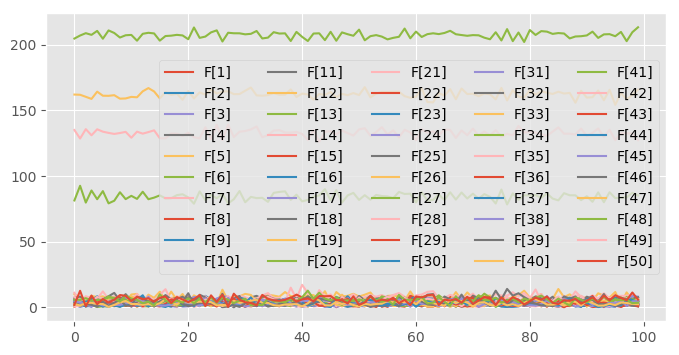

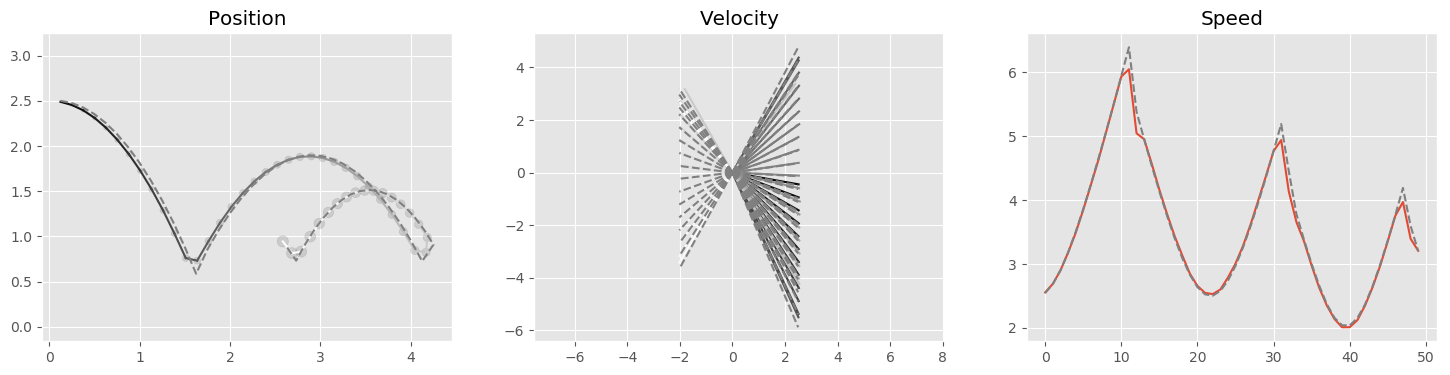

In [10]:
let fig = plt.figure(figsize=(8, 4))
    for i in 1:length(traj_obstacle)
        Fs = sqrt.(get(chn, Symbol("F[$i][1]"))[1].^2 + get(chn, Symbol("F[$i][2]"))[1].^2)
        plt.plot(Fs, label="F[$i]")
    end
    plt.legend(ncol=5)
    fig |> display
end

let n_used = 100, T = length(traj_obstacle)
    traj_list = []
    for i in 1:100
        obj = Particle(1.0, [0.0, 2.5], [2.5, 0.0])
        traj = Vector{typeof(obj)}(undef, T)
        for t in 1:T
            F = let chn_sub = chn[end-n_used+1:end]
                [
                    get(chn_sub, Symbol("F[$t][1]"))[1][i], 
                    get(chn_sub, Symbol("F[$t][2]"))[1][i],
                ]
            end
            obj = transition(obj, EarthWithForce(Force(F)), sim005)
            traj[t] = obj
        end
        push!(traj_list, (pos=positionof.(traj), vel=velocityof.(traj)))
    end
    fig, axes = plot(meantraj(traj_list), traj_obstacle)
    updatedev!(first(axes), traj_list)
    display(fig)
end

;